# Prelude

In [1]:
function one_hot_encode(Y_labels, num_classes::Int=10)
    # Ensure Y_labels is treated as a 1D iterable of integers
    labels_vector = vec(Y_labels) 
    N = length(labels_vector)
    Y_ohe = zeros(Float32, num_classes, N)
    for i in 1:N
        label = labels_vector[i]
        row_index = label + 1
        Y_ohe[row_index, i] = 1.0
    end
    
    return Y_ohe
end

one_hot_encode (generic function with 2 methods)

In [2]:
using Mlyn, CategoricalArrays, CSV, DataFrames

function load_forestfires(Y_name, train_test_ratio = 0.8)
    # Loading and preprocessing
    forest_fires = CSV.read("../data/forestfires.csv", DataFrame)
    forest_fires.month = levelcode.(CategoricalArray(forest_fires.month))
    forest_fires.day = levelcode.(CategoricalArray(forest_fires.day))
    forest_fires = mapcols(col -> Float32.(col), forest_fires)

    # Getting X and Y
    X = select(forest_fires, Not(Y_name))
    Y = select(forest_fires, Y_name)
    X, Y = Matrix(X)', Matrix(Y)'

    return train_test_split(X, Y, train_test_ratio)
end

load_forestfires (generic function with 2 methods)

In [3]:
function load_mnist_part(path)
    mnist_dataset = CSV.read(path, DataFrame)
    X = select(mnist_dataset, Not(:label))
    Y = select(mnist_dataset, :label)
    X, Y = Matrix(X)', Matrix(Y)'
    return X, one_hot_encode(Y)
end

load_mnist_part (generic function with 1 method)

In [4]:
function load_mnist_full()
    X_train, Y_train = load_mnist_part("../data/mnist_train.csv")
    X_test, Y_test = load_mnist_part("../data/mnist_test.csv")
    return X_train, Y_train, X_test, Y_test
end

load_mnist_full (generic function with 1 method)

# Making sure that it works

[EPOCH 1] Test loss = 0.32814076467158476; Learning loss = 0.4442642149278886
[EPOCH 5] Test loss = 0.07308889135353386; Learning loss = 0.08743282003882345
[EPOCH 10] Test loss = 0.028033487325851165; Learning loss = 0.02821783634211109
[EPOCH 15] Test loss = 0.016197325446590194; Learning loss = 0.012211056137719811
[EPOCH 20] Test loss = 0.012727115613537744; Learning loss = 0.007429931054476501
[EPOCH 25] Test loss = 0.01251802233226353; Learning loss = 0.004943035929123851
[EPOCH 30] Test loss = 0.012481925215335128; Learning loss = 0.0038714668715073394
[EPOCH 35] Test loss = 0.012153382675761677; Learning loss = 0.0025863138268029063
[EPOCH 40] Test loss = 0.013166112026739138; Learning loss = 0.002482096684222789
[EPOCH 45] Test loss = 0.012937442778941443; Learning loss = 0.001973177478594512
[EPOCH 50] Test loss = 0.014201907083207725; Learning loss = 0.0017227548417977916


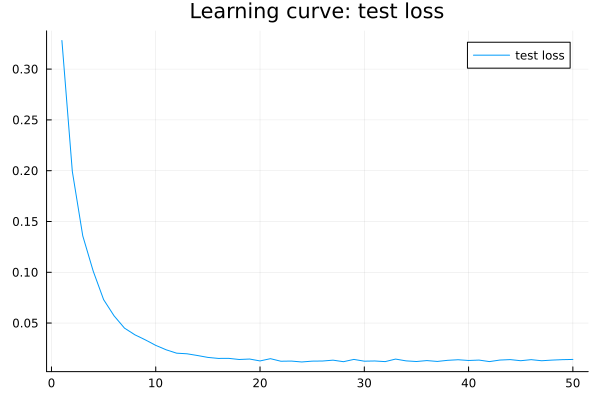

In [51]:
model = create_model(classification, [
    BlueprintLinear(784, 258, method_xavier_uniform),
    BlueprintBatchNorm1D(n_features=258),
    BlueprintActivation(method_sigmoid),

    BlueprintLinear(258, 126, method_xavier_uniform),
    BlueprintBatchNorm1D(n_features=126),
    BlueprintActivation(method_sigmoid),

    BlueprintLinear(126, 10, method_xavier_uniform),
    BlueprintBatchNorm1D(n_features=10),
    BlueprintActivation(method_sigmoid),
])
X_train, Y_train, X_test, Y_test = load_mnist_full()
optimizer = OptimizerAdam()
init_adam!(optimizer, model.layers)
history = train!(model, optimizer, 50, X_train, Y_train, X_test, Y_test; batch_size=100, logging=true, log_period=5)
history_plot_test_loss(history)

[EPOCH 1] Test loss = 3218.0462740384614; Learning loss = 1786.6640274944762
[EPOCH 100] Test loss = 3158.5958533653848; Learning loss = 1760.3432828524753
[EPOCH 200] Test loss = 3137.9149639423076; Learning loss = 5001.084863577948
[EPOCH 300] Test loss = 3075.459735576923; Learning loss = 1716.759658689348
[EPOCH 400] Test loss = 3086.2421875; Learning loss = 1714.1563868023102
[EPOCH 500] Test loss = 3052.021935096154; Learning loss = 1692.0762578933961
[EPOCH 600] Test loss = 2968.360576923077; Learning loss = 1698.471855236236
[EPOCH 700] Test loss = 2993.1493389423076; Learning loss = 1686.2483857775494
[EPOCH 800] Test loss = 2944.8064903846152; Learning loss = 1677.050867886014
[EPOCH 900] Test loss = 2953.540264423077; Learning loss = 1675.9965530637705
[EPOCH 1000] Test loss = 2921.989783653846; Learning loss = 1676.0634506467786


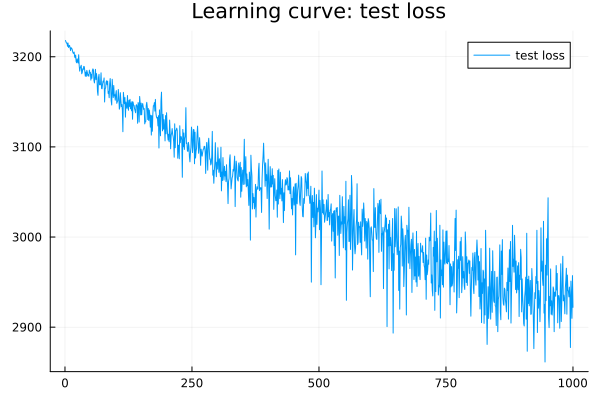

In [68]:
model = create_model(regression, [
    BlueprintLinear(12, 8, method_kaiming),
    BlueprintBatchNorm1D(n_features=8),
    BlueprintActivation(method_relu),

    BlueprintLinear(8, 1, method_kaiming),
    BlueprintBatchNorm1D(n_features=1),
    BlueprintActivation(method_relu),
])
X_train, Y_train, X_test, Y_test = load_forestfires(:area)
optimizer = OptimizerAdam()
init_adam!(optimizer, model.layers)
history = train!(model, optimizer, 1000, X_train, Y_train, X_test, Y_test; batch_size=10, logging=true, log_period=100)
history_plot_test_loss(history)

# Experiment 1: learning rate

In [88]:
function perform_learning_rate_experiment(learning_rate)
    model = create_model(regression, [
        BlueprintLinear(12, 8, method_xavier_normal),
        BlueprintBatchNorm1D(n_features=8),
        BlueprintActivation(method_sigmoid),
    
        BlueprintLinear(8, 1, method_xavier_normal),
        BlueprintBatchNorm1D(n_features=1),
        BlueprintActivation(method_sigmoid),
    ])
    X_train, Y_train, X_test, Y_test = load_forestfires(:rain)
    optimizer = OptimizerSGD(learning_rate=learning_rate)
    history = train!(model, optimizer, 25, X_train, Y_train, X_test, Y_test; batch_size=10, logging=false)
    history_plot_test_loss(history)
end

perform_learning_rate_experiment (generic function with 1 method)

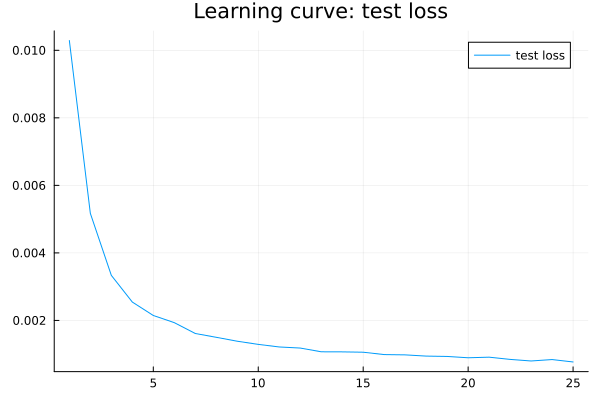

In [93]:
perform_learning_rate_experiment(1)

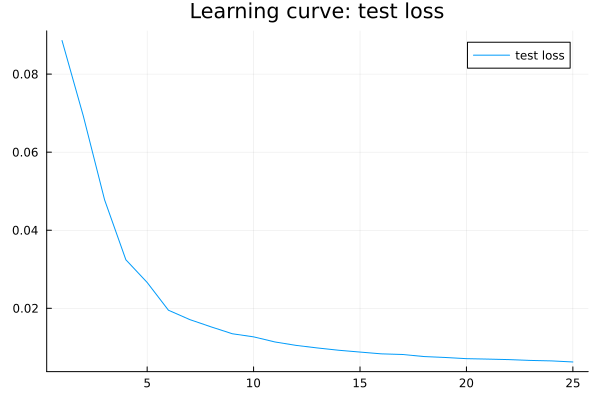

In [97]:
perform_learning_rate_experiment(0.1)

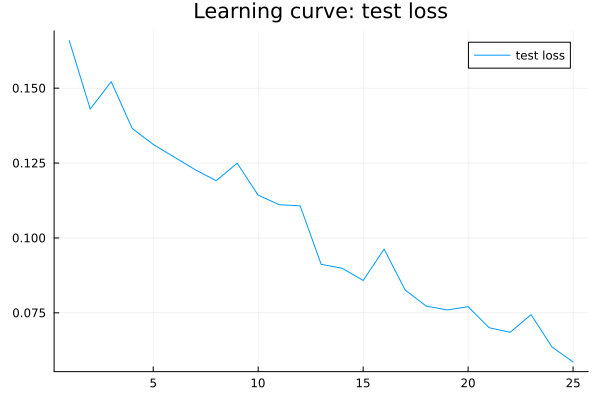

In [94]:
perform_learning_rate_experiment(0.01)

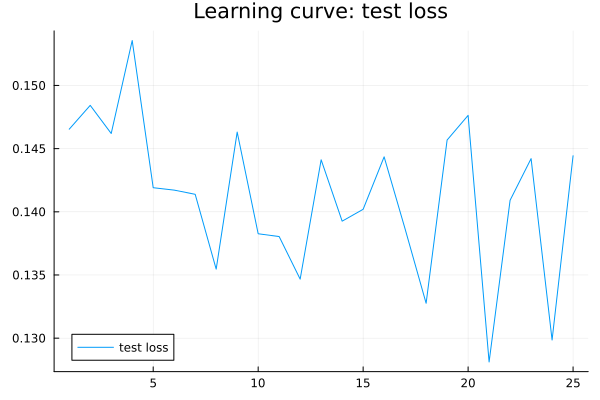

In [95]:
perform_learning_rate_experiment(0.001)

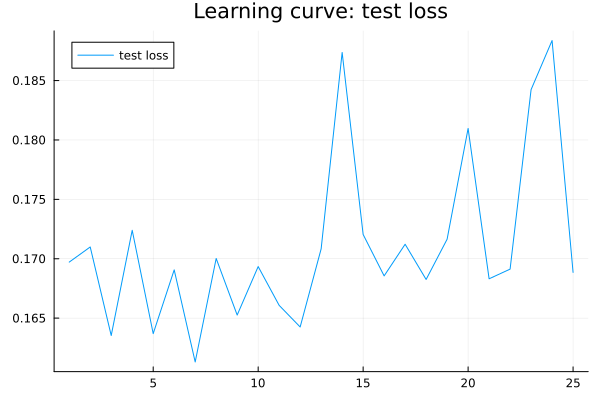

In [96]:
perform_learning_rate_experiment(0.0001)

In [101]:
function perform_learning_rate_experiment(learning_rate)
    model = create_model(classification, [
        BlueprintLinear(784, 258, method_xavier_uniform),
        BlueprintBatchNorm1D(n_features=258),
        BlueprintActivation(method_sigmoid),
    
        BlueprintLinear(258, 126, method_xavier_uniform),
        BlueprintBatchNorm1D(n_features=126),
        BlueprintActivation(method_sigmoid),
    
        BlueprintLinear(126, 10, method_xavier_uniform),
        BlueprintBatchNorm1D(n_features=10),
        BlueprintActivation(method_sigmoid),
    ])
    X_train, Y_train, X_test, Y_test = load_mnist_full()
    optimizer = OptimizerAdam(α=learning_rate)
    init_adam!(optimizer, model.layers)
    history = train!(model, optimizer, 15, X_train, Y_train, X_test, Y_test; batch_size=100, logging=true, log_period=5)
    history_plot_test_loss(history)
end

perform_learning_rate_experiment (generic function with 1 method)

[EPOCH 1] Test loss = 0.06209987842601289; Learning loss = 0.08576855689019094
[EPOCH 5] Test loss = 0.058054509119478064; Learning loss = 0.07236291788283342
[EPOCH 10] Test loss = 0.05610216747200572; Learning loss = 0.0681884523919752
[EPOCH 15] Test loss = 0.05005458304813662; Learning loss = 0.06790003383831807


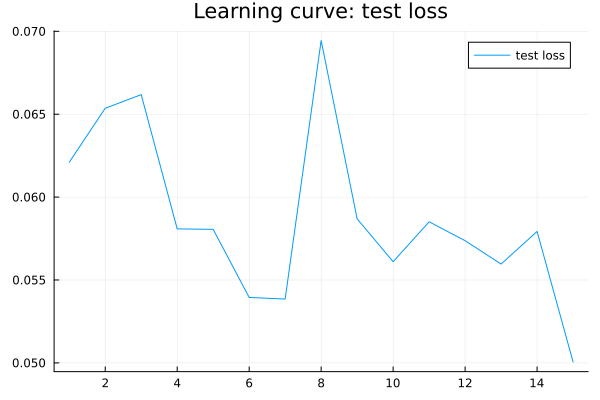

In [102]:
perform_learning_rate_experiment(1)

[EPOCH 1] Test loss = 0.025255935106955507; Learning loss = 0.05946347529685597
[EPOCH 5] Test loss = 0.01701284487918118; Learning loss = 0.01523056990419209
[EPOCH 10] Test loss = 0.01668493602687567; Learning loss = 0.009741782447169644
[EPOCH 15] Test loss = 0.015323279027147595; Learning loss = 0.007606521241749337


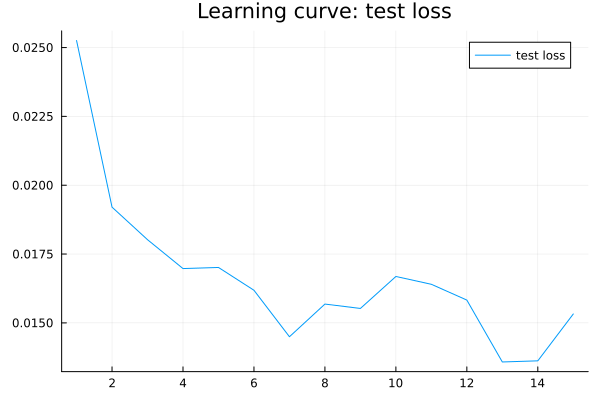

In [103]:
perform_learning_rate_experiment(0.1)

[EPOCH 1] Test loss = 0.05224453321476835; Learning loss = 0.16494401727920363
[EPOCH 5] Test loss = 0.014734518122664358; Learning loss = 0.013380450024842123
[EPOCH 10] Test loss = 0.014009420671622528; Learning loss = 0.007015322642472215
[EPOCH 15] Test loss = 0.014517218207810332; Learning loss = 0.004066114500212139


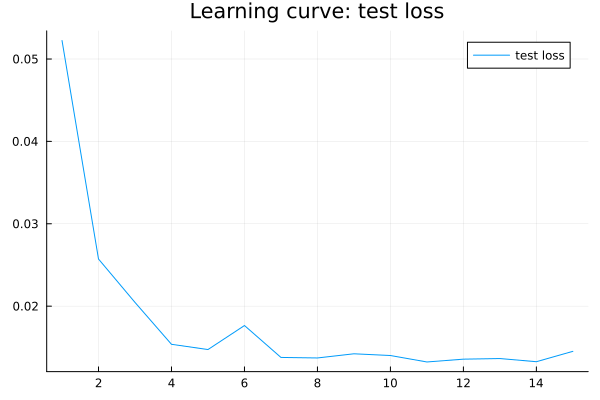

In [104]:
perform_learning_rate_experiment(0.01)

[EPOCH 1] Test loss = 0.3144930185668213; Learning loss = 0.4434433691523278
[EPOCH 5] Test loss = 0.07415431912796766; Learning loss = 0.08787705217630008
[EPOCH 10] Test loss = 0.027382576472602047; Learning loss = 0.02801968403581443
[EPOCH 15] Test loss = 0.015328546489285845; Learning loss = 0.012594889476665825


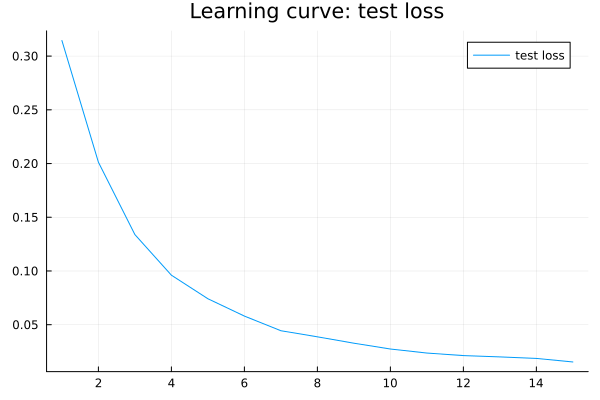

In [105]:
perform_learning_rate_experiment(0.001)

# Experiment 2: param initialization and activation

1. Xavier is particularly useful for functions like sigmoid and tanh
2. He (Kaiming) initialization is useful for ReLU(-like) functions
3. With a constant value being the param init, each neuron will yield same output, hence the whole layer will behave as a single neuron

In [9]:
function perform_config_experiment(init, activation)
    model = create_model(classification, [
        BlueprintLinear(784, 258, init),
        BlueprintBatchNorm1D(n_features=258),
        BlueprintActivation(activation),
    
        BlueprintLinear(258, 10, method_xavier_uniform),
        BlueprintBatchNorm1D(n_features=10),
        BlueprintActivation(method_sigmoid),
    ])
    X_train, Y_train, X_test, Y_test = load_mnist_full()
    optimizer = OptimizerAdam()
    init_adam!(optimizer, model.layers)
    history = train!(model, optimizer, 15, X_train, Y_train, X_test, Y_test; batch_size=100, logging=true, log_period=5)
    history_plot_test_loss(history)
end

perform_config_experiment (generic function with 1 method)

[EPOCH 1] Test loss = 0.3304751551207896; Learning loss = 0.45915812760892405
[EPOCH 5] Test loss = 0.07929770522302926; Learning loss = 0.09344234001818676
[EPOCH 10] Test loss = 0.030800420778328827; Learning loss = 0.03306155635452509
[EPOCH 15] Test loss = 0.020084242768099697; Learning loss = 0.017222206458709605


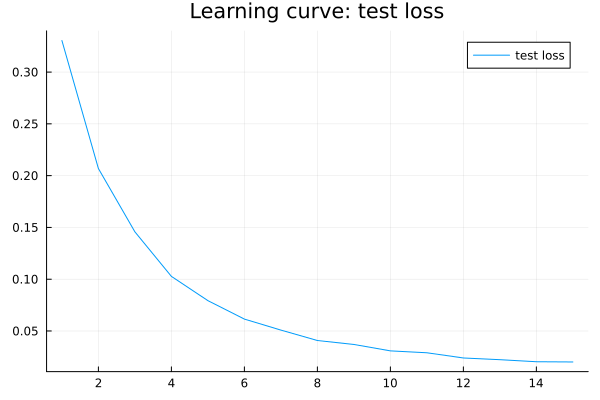

In [109]:
perform_config_experiment(method_xavier_normal, method_sigmoid)

[EPOCH 1] Test loss = 0.3533451541343435; Learning loss = 0.4612835387306541
[EPOCH 5] Test loss = 0.08102432254645438; Learning loss = 0.0936393928676152
[EPOCH 10] Test loss = 0.02973153072850096; Learning loss = 0.03321753602575865
[EPOCH 15] Test loss = 0.018932765798982423; Learning loss = 0.01655955396180499


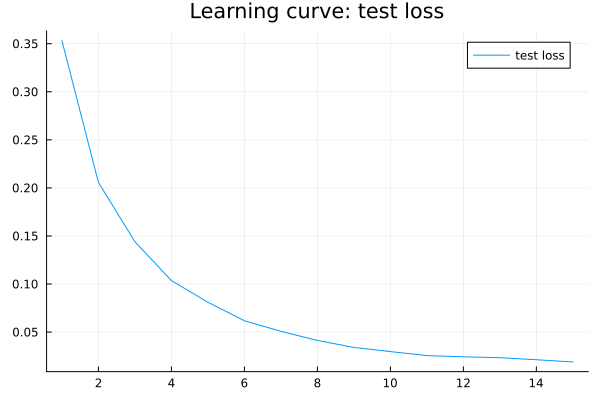

In [110]:
perform_config_experiment(method_xavier_uniform, method_sigmoid)

[EPOCH 1] Test loss = 0.3115343628614379; Learning loss = 0.42324697405228956
[EPOCH 5] Test loss = 0.07414585580471869; Learning loss = 0.08641385256684979
[EPOCH 10] Test loss = 0.027472907516233963; Learning loss = 0.027532112265832413
[EPOCH 15] Test loss = 0.01698583799032346; Learning loss = 0.0125963547386016


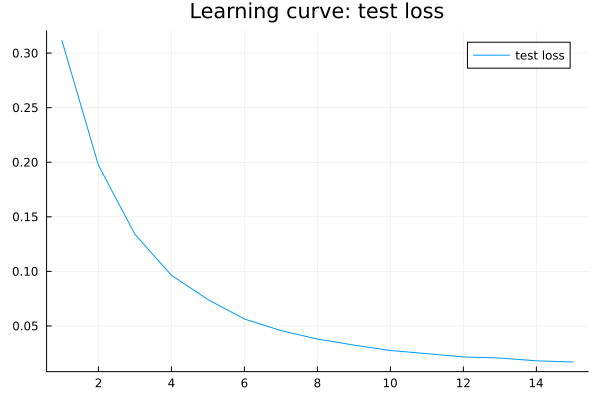

In [115]:
perform_config_experiment(method_kaiming, method_relu)

[EPOCH 1] Test loss = 0.31490326052510953; Learning loss = 0.42228739243642704
[EPOCH 5] Test loss = 0.07186916642286109; Learning loss = 0.08578307521819883
[EPOCH 10] Test loss = 0.0273036834180383; Learning loss = 0.027690073907278928
[EPOCH 15] Test loss = 0.016717806895543127; Learning loss = 0.01268486490138241


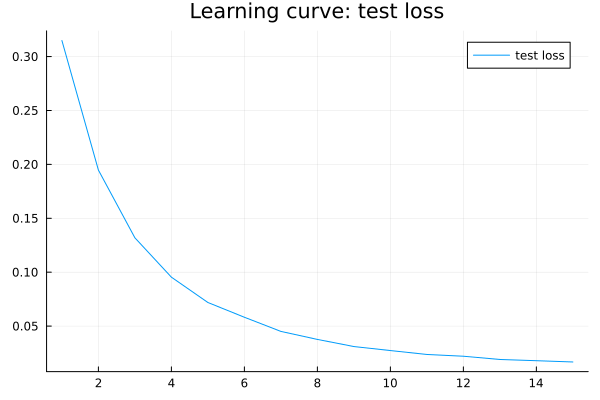

In [116]:
perform_config_experiment(method_xavier_uniform, method_relu)

In [7]:
function perform_config_experiment(init, activation)
    model = create_model(regression, [
        BlueprintLinear(12, 8, init),
        BlueprintBatchNorm1D(n_features=8),
        BlueprintActivation(activation),

        BlueprintLinear(8, 6, init),
        BlueprintBatchNorm1D(n_features=6),
        BlueprintActivation(activation),

        BlueprintLinear(6, 3, init),
        BlueprintBatchNorm1D(n_features=3),
        BlueprintActivation(activation),
    
        BlueprintLinear(3, 1, method_xavier_normal),
        BlueprintBatchNorm1D(n_features=1),
        BlueprintActivation(method_sigmoid),
    ])
    X_train, Y_train, X_test, Y_test = load_forestfires(:rain)
    optimizer = OptimizerSGD(learning_rate=0.01)
    history = train!(model, optimizer, 25, X_train, Y_train, X_test, Y_test; batch_size=10, logging=false)
    history_plot_test_loss(history)
end

perform_config_experiment (generic function with 1 method)

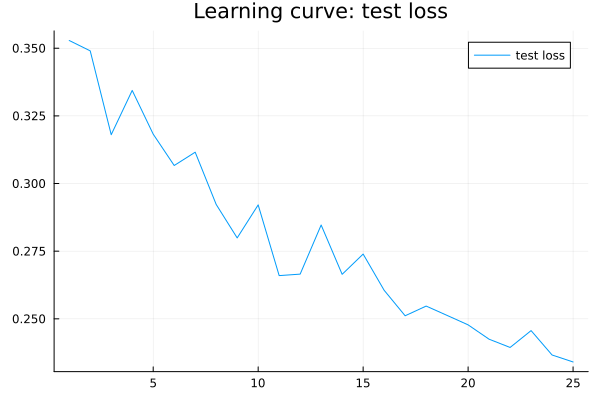

In [120]:
perform_config_experiment(method_xavier_uniform, method_relu)

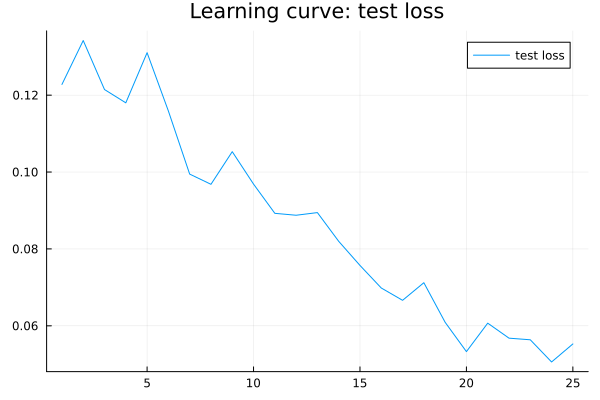

In [121]:
perform_config_experiment(method_xavier_uniform, method_sigmoid)

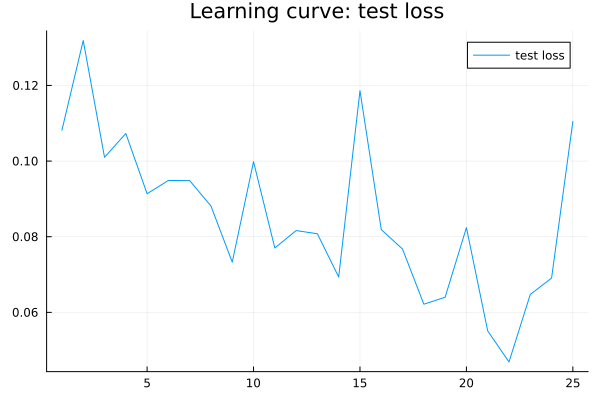

In [122]:
perform_config_experiment(method_xavier_normal, method_relu)

[EPOCH 1] Test loss = 4.195740555949466; Learning loss = 5.339963251576824
[EPOCH 5] Test loss = 1.0094535772187796; Learning loss = 1.2358438445908961
[EPOCH 10] Test loss = 0.4342504769066837; Learning loss = 0.4797930650054109
[EPOCH 15] Test loss = 0.24765544362536926; Learning loss = 0.27598417841212974


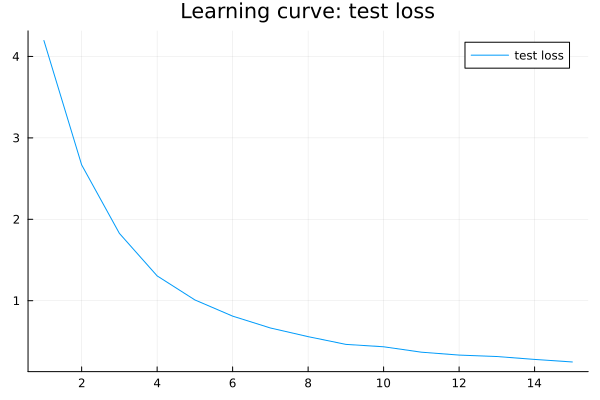

In [10]:
perform_config_experiment(method_const, method_relu)

# Experiment 3: batch normalization

[EPOCH 1] Test loss = 0.09576205769698168; Learning loss = 0.20193265618928116
[EPOCH 5] Test loss = 0.04076629528565686; Learning loss = 0.04292309951302054
[EPOCH 10] Test loss = 0.03405878351519278; Learning loss = 0.03483186594975077
[EPOCH 15] Test loss = 0.03002917165258441; Learning loss = 0.02908745969659312


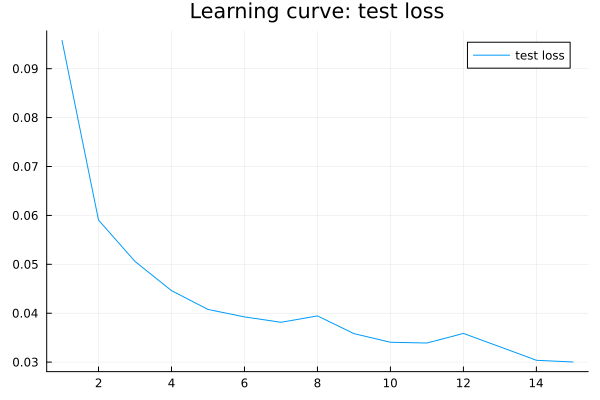

In [124]:
model = create_model(classification, [
    BlueprintLinear(784, 258, method_xavier_normal),
    BlueprintActivation(method_sigmoid),

    BlueprintLinear(258, 128, method_xavier_normal),
    BlueprintActivation(method_sigmoid),

    BlueprintLinear(128, 64, method_xavier_normal),
    BlueprintActivation(method_sigmoid),

    BlueprintLinear(64, 10, method_xavier_normal),
    BlueprintActivation(method_sigmoid),
])
X_train, Y_train, X_test, Y_test = load_mnist_full()
optimizer = OptimizerAdam()
init_adam!(optimizer, model.layers)
history = train!(model, optimizer, 15, X_train, Y_train, X_test, Y_test; batch_size=100, logging=true, log_period=5)
history_plot_test_loss(history)

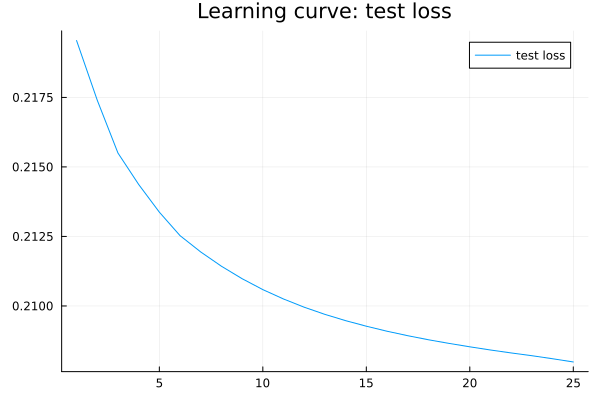

In [126]:
model = create_model(regression, [
    BlueprintLinear(12, 8, method_xavier_normal),
    BlueprintActivation(method_sigmoid),

    BlueprintLinear(8, 1, method_xavier_normal),
    BlueprintActivation(method_sigmoid),
])
X_train, Y_train, X_test, Y_test = load_forestfires(:rain)
optimizer = OptimizerSGD(learning_rate=0.01)
history = train!(model, optimizer, 25, X_train, Y_train, X_test, Y_test; batch_size=10, logging=false)
history_plot_test_loss(history)

Batchnorm enables faster learning rates, enhnces network stability and solves problem of vanishing / exploding gradients.
Solves internal covariate shift, and acts as regularizer

# Experiment 4: different optimizers

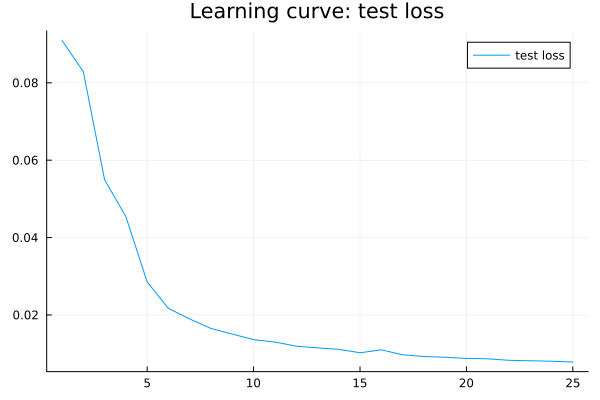

In [13]:
using Mlyn

model = create_model(regression, [
    BlueprintLinear(12, 8, method_xavier_normal),
    BlueprintBatchNorm1D(n_features=8),
    BlueprintActivation(method_sigmoid),

    BlueprintLinear(8, 1, method_xavier_normal),
    BlueprintBatchNorm1D(n_features=1),
    BlueprintActivation(method_sigmoid),
])
X_train, Y_train, X_test, Y_test = load_forestfires(:rain)
optimizer = OptimizerSGDM()
init_sgdm!(optimizer, model.layers)
history = train!(model, optimizer, 25, X_train, Y_train, X_test, Y_test; batch_size=10, logging=false)
history_plot_test_loss(history)

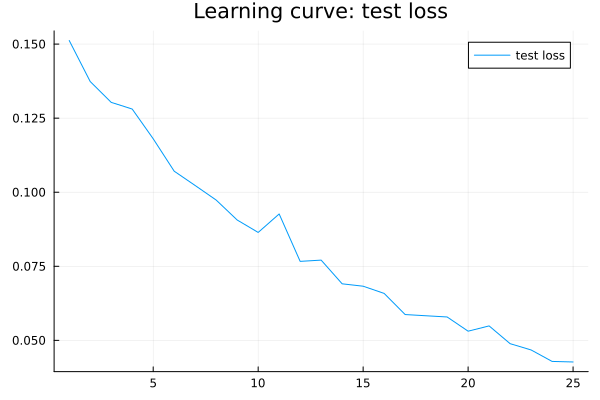

In [15]:
using Mlyn

model = create_model(regression, [
    BlueprintLinear(12, 8, method_xavier_normal),
    BlueprintBatchNorm1D(n_features=8),
    BlueprintActivation(method_sigmoid),

    BlueprintLinear(8, 1, method_xavier_normal),
    BlueprintBatchNorm1D(n_features=1),
    BlueprintActivation(method_sigmoid),
])
X_train, Y_train, X_test, Y_test = load_forestfires(:rain)
optimizer = OptimizerAdam()
init_adam!(optimizer, model.layers)
history = train!(model, optimizer, 25, X_train, Y_train, X_test, Y_test; batch_size=10, logging=false)
history_plot_test_loss(history)

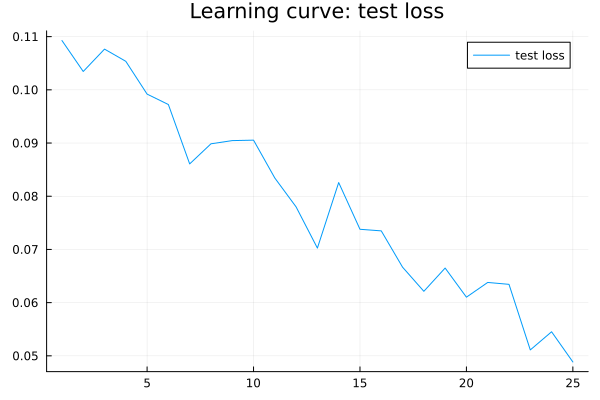

In [11]:
using Mlyn

model = create_model(regression, [
    BlueprintLinear(12, 8, method_xavier_normal),
    BlueprintBatchNorm1D(n_features=8),
    BlueprintActivation(method_sigmoid),

    BlueprintLinear(8, 1, method_xavier_normal),
    BlueprintBatchNorm1D(n_features=1),
    BlueprintActivation(method_sigmoid),
])
X_train, Y_train, X_test, Y_test = load_forestfires(:rain)
optimizer = OptimizerSGD(learning_rate=0.01)
history = train!(model, optimizer, 25, X_train, Y_train, X_test, Y_test; batch_size=10, logging=false)
history_plot_test_loss(history)

[EPOCH 1] Test loss = 2.3228395042933503; Learning loss = 3.6951433146510198
[EPOCH 5] Test loss = 1.0713338109262145; Learning loss = 1.1888954086775099
[EPOCH 10] Test loss = 0.684622298381907; Learning loss = 0.7743381187293352
[EPOCH 15] Test loss = 0.4939893766217561; Learning loss = 0.5531088958868214


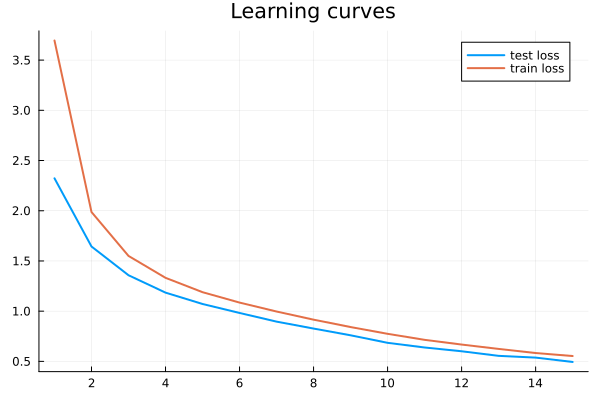

In [16]:
model = create_model(classification, [
    BlueprintLinear(784, 128, method_xavier_uniform),
    BlueprintBatchNorm1D(n_features=128),
    BlueprintActivation(method_sigmoid),

    BlueprintLinear(128, 10, method_xavier_uniform),
    BlueprintBatchNorm1D(n_features=10),
    BlueprintActivation(method_sigmoid),
])
X_train, Y_train, X_test, Y_test = load_mnist_full()
optimizer = OptimizerSGD(learning_rate=0.01)
history = train!(model, optimizer, 15, X_train, Y_train, X_test, Y_test; batch_size=100, logging=true, log_period=5)
history_plot(history)

[EPOCH 1] Test loss = 0.8550748090888605; Learning loss = 1.5702088506843943
[EPOCH 5] Test loss = 0.356674487471363; Learning loss = 0.39109934379885825
[EPOCH 10] Test loss = 0.224584702350493; Learning loss = 0.23586457251525908
[EPOCH 15] Test loss = 0.18907099849898026; Learning loss = 0.17820507729723828


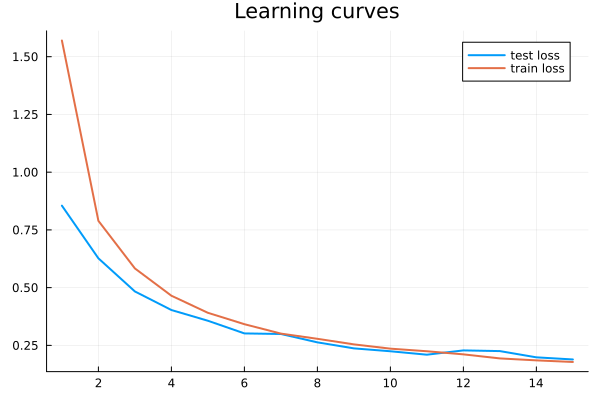

In [18]:
model = create_model(classification, [
    BlueprintLinear(784, 128, method_xavier_uniform),
    BlueprintBatchNorm1D(n_features=128),
    BlueprintActivation(method_sigmoid),

    BlueprintLinear(128, 10, method_xavier_uniform),
    BlueprintBatchNorm1D(n_features=10),
    BlueprintActivation(method_sigmoid),
])
X_train, Y_train, X_test, Y_test = load_mnist_full()
optimizer = OptimizerSGDM()
init_sgdm!(optimizer, model.layers)
history = train!(model, optimizer, 15, X_train, Y_train, X_test, Y_test; batch_size=100, logging=true, log_period=5)
history_plot(history)

[EPOCH 1] Test loss = 3.376528625349536; Learning loss = 4.655238771981025
[EPOCH 5] Test loss = 0.8327895539837727; Learning loss = 0.981822702662107
[EPOCH 10] Test loss = 0.335450866583555; Learning loss = 0.3697959264909128
[EPOCH 15] Test loss = 0.21699883408088436; Learning loss = 0.20960213042291606


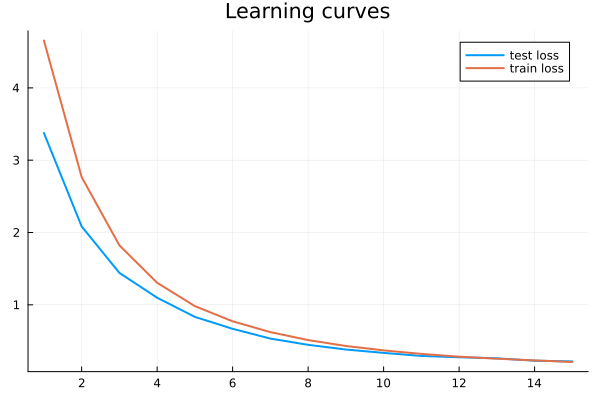

In [19]:
model = create_model(classification, [
    BlueprintLinear(784, 128, method_xavier_uniform),
    BlueprintBatchNorm1D(n_features=128),
    BlueprintActivation(method_sigmoid),

    BlueprintLinear(128, 10, method_xavier_uniform),
    BlueprintBatchNorm1D(n_features=10),
    BlueprintActivation(method_sigmoid),
])
X_train, Y_train, X_test, Y_test = load_mnist_full()
optimizer = OptimizerAdam()
init_adam!(optimizer, model.layers)
history = train!(model, optimizer, 15, X_train, Y_train, X_test, Y_test; batch_size=100, logging=true, log_period=5)
history_plot(history)

# Experiment 5: MNIST vs affNIST

I found a dataset here: [affNIST](https://www.cs.toronto.edu/~tijmen/affNIST/)

# Activity Points

[EPOCH 1] Test loss = 3.5994491551115146; Learning loss = 4.6729971385267355
[EPOCH 1] Average gradient = 0.02685184
[EPOCH 5] Test loss = 0.8310370139588209; Learning loss = 0.9856037132835197
[EPOCH 5] Average gradient = 0.0056963544
[EPOCH 10] Test loss = 0.3524301075433959; Learning loss = 0.37330650971926416
[EPOCH 10] Average gradient = 0.0010861353
[EPOCH 15] Test loss = 0.21781893719341305; Learning loss = 0.20919674911191222
[EPOCH 15] Average gradient = 0.0007750902


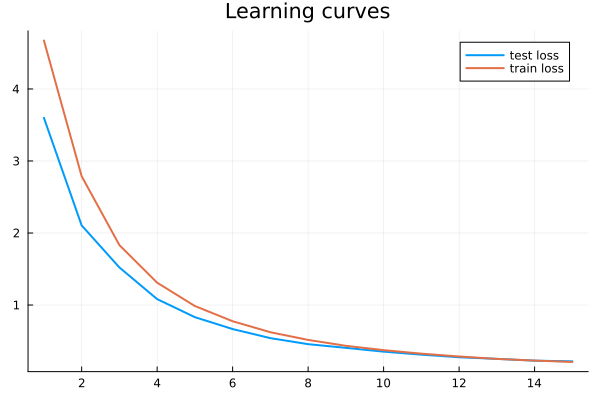

In [20]:
model = create_model(classification, [
    BlueprintLinear(784, 128, method_xavier_uniform),
    BlueprintBatchNorm1D(n_features=128),
    BlueprintActivation(method_sigmoid),

    BlueprintLinear(128, 10, method_xavier_uniform),
    BlueprintBatchNorm1D(n_features=10),
    BlueprintActivation(method_sigmoid),
])
X_train, Y_train, X_test, Y_test = load_mnist_full()
optimizer = OptimizerAdam()
init_adam!(optimizer, model.layers)
history = train!(model, optimizer, 15, X_train, Y_train, X_test, Y_test; batch_size=100, logging=true, log_period=5, report_grad=true)
history_plot(history)

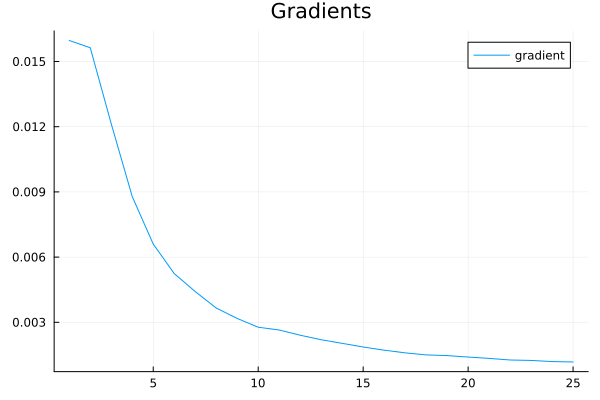

In [23]:
history_plot_gradients(history)

[EPOCH 1] Test loss = 0.09343548649168418; Learning loss = 0.17219599925916418
[EPOCH 1] Average gradient = 0.015966685
[EPOCH 10] Test loss = 0.01947598547084757; Learning loss = 0.058604837343399906
[EPOCH 10] Average gradient = 0.00277281
[EPOCH 20] Test loss = 0.015055173721530849; Learning loss = 0.05365019791671733
[EPOCH 20] Average gradient = 0.0014009225
[EPOCH 25] Test loss = 0.014142399138239694; Learning loss = 0.0529704398380936
[EPOCH 25] Average gradient = 0.0011742394


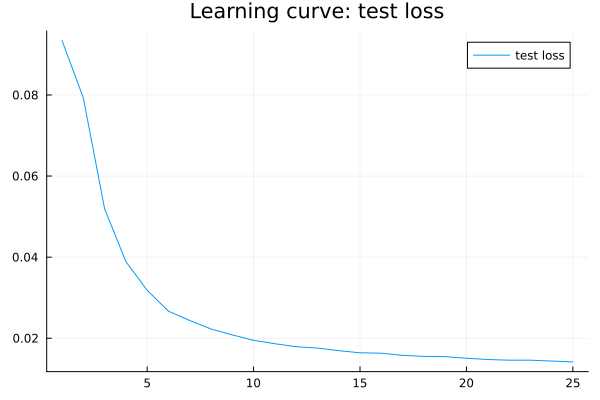

In [22]:
model = create_model(regression, [
    BlueprintLinear(12, 8, method_xavier_normal),
    BlueprintBatchNorm1D(n_features=8),
    BlueprintActivation(method_sigmoid),

    BlueprintLinear(8, 1, method_xavier_normal),
    BlueprintBatchNorm1D(n_features=1),
    BlueprintActivation(method_sigmoid),
])
X_train, Y_train, X_test, Y_test = load_forestfires(:rain)
optimizer = OptimizerSGDM()
init_sgdm!(optimizer, model.layers)
history = train!(model, optimizer, 25, X_train, Y_train, X_test, Y_test; batch_size=10, logging=true, report_grad=true)
history_plot_test_loss(history)

[EPOCH 1] Test loss = 14.381036595288164; Learning loss = 14.633996436776927
[EPOCH 1] Average gradient = 0.031384125
[EPOCH 5] Test loss = 11.642849499150428; Learning loss = 11.778140144662679
[EPOCH 5] Average gradient = -0.016021172
[EPOCH 10] Test loss = 8.66373227106478; Learning loss = 8.799974519150844
[EPOCH 10] Average gradient = 0.010960896
[EPOCH 15] Test loss = 8.586622080076372; Learning loss = 8.58836117526783
[EPOCH 15] Average gradient = 1.8137395e-9


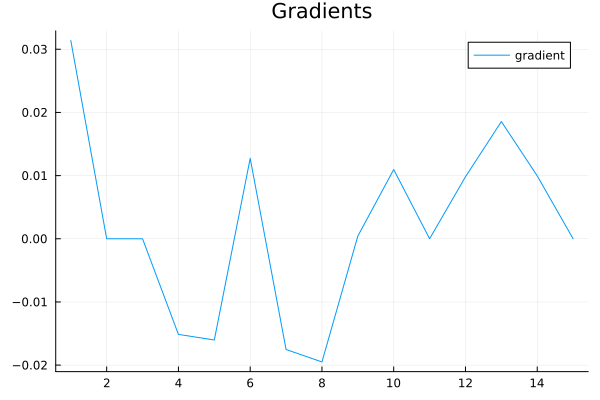

In [25]:
model = create_model(classification, [
    BlueprintLinear(784, 128, method_kaiming),
    BlueprintActivation(method_relu),

    BlueprintLinear(128, 10, method_xavier_uniform),
    BlueprintActivation(method_sigmoid),
])
X_train, Y_train, X_test, Y_test = load_mnist_full()
optimizer = OptimizerAdam()
init_adam!(optimizer, model.layers)
history = train!(model, optimizer, 15, X_train, Y_train, X_test, Y_test; batch_size=100, logging=true, log_period=5, report_grad=true)
history_plot_gradients(history)

[EPOCH 1] Test loss = 0.029692881083163942; Learning loss = 0.09388130606019073
[EPOCH 1] Average gradient = 0.01073156
[EPOCH 10] Test loss = 0.014386837579585634; Learning loss = 0.0508301906310516
[EPOCH 10] Average gradient = 0.0006820067
[EPOCH 20] Test loss = 0.014222038573840136; Learning loss = 0.050649297322562126
[EPOCH 20] Average gradient = 0.00082504837
[EPOCH 25] Test loss = 0.014179785734345227; Learning loss = 0.05059254284697334
[EPOCH 25] Average gradient = 0.00041932781


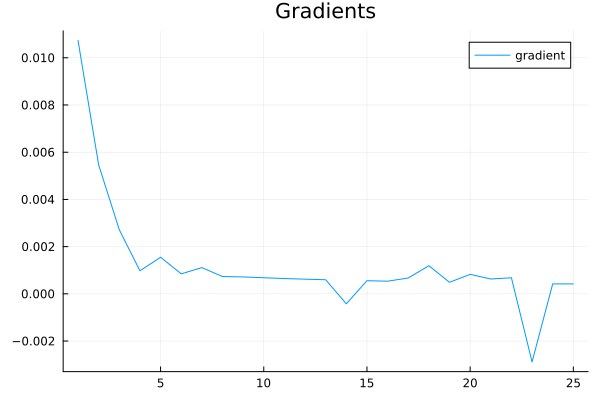

In [39]:
model = create_model(regression, [
    BlueprintLinear(12, 8, method_xavier_normal),
    BlueprintActivation(method_sigmoid),

    BlueprintLinear(8, 1, method_xavier_normal),
    BlueprintActivation(method_sigmoid),
])
X_train, Y_train, X_test, Y_test = load_forestfires(:rain)
optimizer = OptimizerSGDM()
init_sgdm!(optimizer, model.layers)
history = train!(model, optimizer, 25, X_train, Y_train, X_test, Y_test; batch_size=10, logging=true, report_grad=true)
history_plot_gradients(history)